# _Notebook Jupyter_ 7_treinamentoClassificador

# Classificação da Aplicação por aprendizado de máquina

## Importando bibliotecas

In [1]:
import pandas as pd, time
# Vetorização
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# Modelos
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
# Métricas
from sklearn import metrics
# Divisor de Treino/Treste
from sklearn.model_selection import train_test_split
# Matplot
import matplotlib.pyplot as plt

In [2]:
# importa funções criadas no módulo 3_classificarAplicação.ipynb (criarModelo.py)
from funcoesTCC import *
# Funções: criaModelo, limpaDescricao, achaPalavraChave, pegaChave, acrescentaMarca
# Variávis: stopwords, palavrasChave, Marcas
# Datasets: dftemp (Aplicações)

In [3]:
# Data e hora da execução do script
print(f'Código executado em {time.strftime("%d/%m/%Y às %H:%M", time.localtime(time.time()))}')

Código executado em 10/01/2022 às 20:44


## Carregando dataset

In [4]:
# Importa base de dados com os modelos já determinados para um dataframe
df = pd.read_excel('dataframe_modelos_classificado.xlsx')
df.iloc[2100:,-3:].head()

,Modelo,APLICACAO,RETENTOR
2100,HONDA TIT AN 125 TITAN FAN,HONDA CG TIT TITAN 125 150 160,True
2101,HONDA TIT AN 125 TITAN FAN,HONDA CG TIT TITAN 125 150 160,True
2102,TITAN AN TIT 150,HONDA CG TIT TITAN 125 150 160,True
2103,YAMAHA 125 YBR FACTOR,YAMAHA FACTOR YBR 125 YBR125,True
2104,125 TITAN TIT AN,HONDA CG TIT TITAN 125 150 160,True


In [5]:
df.sample(5)

,NUMERO DE ORDEM,ANOMES,COD.NCM,DESCRICAO DO CODIGO NCM,PAIS.OR,PAIS DE ORIGEM,PAIS.AQ,PAIS DE AQUISICAO,UND.ESTAT.,UNIDADE DE MEDIDA,...,TOT.UN.PROD.DOLAR,UNIDADE DESEMBARQUE,UNIDADE DESEMBARACO,INCOTERM,NAT.INFORMACAO,SITUACAO DO DESPACHO,DESCRICAO,Modelo,APLICACAO,RETENTOR
14274,862310000100004,202103,87141000,PARTES ACESSÓRIOS P/MOTOCICLET,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP",10,QUILOGRAMA LIQUIDO,...,10559.70,N/INFORMADO,ALF - FORTALEZA,FOB,EFETIVA,DI DESEMBARAÇADA,honda cg titan 150 fan 1045,HONDA CG 150 TIT AN TITAN FAN,HONDA CG TIT TITAN 125 150 160,False
8608,1294060000100002,202010,87141000,PARTES ACESSÓRIOS P/MOTOCICLET,160,"CHINA, REPUBLICA POP",351,HONG KONG,10,QUILOGRAMA LIQUIDO,...,1940.00,N/INFORMADO,ALF - FORTALEZA,FOB,EFETIVA,DI DESEMBARAÇADA,dure bros 160 xre,HONDA BROS 160 XRE,HONDA XRE 300,False
577,1686270000200025,202001,87141000,PARTES ACESSÓRIOS P/MOTOCICLET,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP",10,QUILOGRAMA LIQUIDO,...,892.25,N/INFORMADO,ITAJAI,FOB,EFETIVA,DI DESEMBARAÇADA,kansas 150 15,KANSAS 150,DAFRA KANSAS,False
11676,1247520000400043,202101,87141000,PARTES ACESSÓRIOS P/MOTOCICLET,351,HONG KONG,351,HONG KONG,10,QUILOGRAMA LIQUIDO,...,2877.67,N/INFORMADO,PORTO DE SANTOS,CFR,EFETIVA,DI DESEMBARAÇADA,starke ys fazer 150,YAMAHA 150 FAZER,YAMAHA FAZER YS150 150,False
8989,50370000100004,202011,87141000,PARTES ACESSÓRIOS P/MOTOCICLET,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP",10,QUILOGRAMA LIQUIDO,...,22500.00,N/INFORMADO,PORTO DE MANAUS,FOB,EFETIVA,DI DESEMBARAÇADA,titan-160 titan 160,160 TITAN TIT AN,HONDA CG TIT TITAN 125 150 160,False


In [6]:
# Verifica o tamnanho do dataframe
df.shape

(18237, 29)

#### Define linha de exemplo

In [7]:
linha=15252 # linha a ser utilizada como exemplo
descricao = df.iloc[linha]['DESCRICAO DO PRODUTO'] 
# verifica a descrição do produto
descricao

'KIT DE TRANSMISSAO , MARCA RIFFEL, TITANIUM (1045) PARA MOTOCICLETAS CB 300R, COMPOSTO DE CORRENTE 520 X M184 + COROA 40067 37Z + PINHAO 25140 13Z (CERTIFICADO NR. BR31512031) - ITEM: 91050'

#### Exemplo da função que cria o modelo a ser utilizado no classificador treinado

In [8]:
# cria a descrição do modelo que será usado na predição
criaModelo(descricao)

'HONDA CB 300R'

## CountVectorizer

### CountVectorizer do DataSet

In [9]:
# Criação da função CountVectorizer
cvt = CountVectorizer(strip_accents='ascii', lowercase=True)

In [10]:
X_cvt = cvt.fit_transform(df['Modelo'])

In [11]:
# Criação da função TfidfTransformer
tfi = TfidfTransformer(use_idf=True)

In [12]:
X_tfi = tfi.fit_transform(X_cvt)

In [13]:
# A entrada será a transformação de vetores com a normalização tf-idf
entrada = X_tfi
# A saida será as aplicações
saida = df['APLICACAO']
# Separando 30% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(entrada, saida, test_size=0.3)

# Treinando os Modelos

## <br><span style="color:blue">Modelo LinearSVC</span>

### Treinamento do modelo

In [14]:
# Criando modelo
clfsvc = LinearSVC()
# Treinamento do modelo
clfsvc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### Função de classificação LinearSVC

A função para utilização do modelo, recebe a descrição filtrada Modelo e retorna a aplicação.


In [15]:
def classificaAplicacaoSVC(modelo):
    novo_cvt = cvt.transform(pd.Series(modelo))
    novo_tfi = tfi.transform(novo_cvt)
    aplicacao = clfsvc.predict(novo_tfi)[0]
    return aplicacao

No final o nosso resultado mostrando (Modelo: descrição filtrada para o modelo e Aplicação: aplicação prevista).<br>

In [16]:
# Lista de exemplos de novos produtos
modelos = ['150 CG HONDA TITAN',
           '125 CARGO CG HONDA TITAN',
           'BIZ C100 HONDA',
           '100 HONDA BIZ',
           '100 BIZ BRAVO HONDA',
           '125 YBR GT YAMAHA',
           '250F TWISTER HONDA']
# Loop for para fazer a predição do departamento de novos produtos
for modelo in modelos:
  print('Modelo:', modelo, ' Aplicação:', classificaAplicacaoSVC(modelo))

Modelo: 150 CG HONDA TITAN  Aplicação: HONDA CG TIT TITAN 125 150 160
Modelo: 125 CARGO CG HONDA TITAN  Aplicação: HONDA CG TIT TITAN 125 150 160
Modelo: BIZ C100 HONDA  Aplicação: HONDA BIZ 100 C100 125 C125
Modelo: 100 HONDA BIZ  Aplicação: HONDA BIZ 100 C100 125 C125
Modelo: 100 BIZ BRAVO HONDA  Aplicação: HONDA BIZ 100 C100 125 C125
Modelo: 125 YBR GT YAMAHA  Aplicação: YAMAHA FACTOR YBR 125 YBR125
Modelo: 250F TWISTER HONDA  Aplicação: HONDA TWISTER CBX 250


### Predição e avaliação do Modelo Linear SVC

#### Métricas

In [17]:
# Realizando a predição
resultadosvc = clfsvc.predict(X_test)
# Avaliando o modelo
print('Acurácia: {:.2f}'.format(metrics.accuracy_score(y_test, resultadosvc)))
print('Precisão: {:.2f}'.format(metrics.precision_score(y_test, resultadosvc,average='micro')))
print('Recall:   {:.2f}'.format(metrics.recall_score(y_test, resultadosvc,average='micro')))
print('F1_Score: {:.2f}'.format(metrics.f1_score(y_test, resultadosvc,average='micro')))

Acurácia: 0.99
Precisão: 0.99
Recall:   0.99
F1_Score: 0.99


In [18]:
# Avaliação completa
print(metrics.classification_report(y_test, resultadosvc))

                                 precision    recall  f1-score   support

       AMAZONAS AME 110 AME-110       1.00      1.00      1.00         4
                     BMW F800GS       1.00      1.00      1.00         3
                      BMW R51/3       1.00      1.00      1.00         3
          BRAVAX BVX STREET 130       1.00      1.00      1.00         1
                     BRP CAN-AM       0.00      0.00      0.00         1
                   DAFRA APACHE       1.00      1.00      1.00         9
                   DAFRA KANSAS       1.00      1.00      1.00        18
                     DAFRA NEXT       1.00      1.00      1.00         4
                     DAFRA RIVA       1.00      1.00      1.00        13
                    DAFRA SPEED       1.00      1.00      1.00         8
                    DAFRA SUPER       1.00      1.00      1.00         4
                      DAFRA ZIG       1.00      1.00      1.00         6
    HONDA BIZ 100 C100 125 C125       1.00      1.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


O alerta ao finial do relatório é esperado, tendo em vista que existem aplicações raras e que não aprecerem no grupo de teste.

#### Matriz de Confusão

In [19]:
# importa os módulos
# gera a matriz de confusão formatada (adaptado por mim)
from prettyPlotConfusionMatrix import pretty_plot_confusion_matrix # prettyPlotConfusionMatrix.py local
# código disponível em https://github.com/wcipriano/pretty-print-confusion-matrix
from sklearn.metrics import confusion_matrix

In [20]:
aplicacoessvc = np.unique(resultadosvc) # define os aplicações presentes no resultado
cmsvc = confusion_matrix(y_test, resultadosvc, aplicacoessvc) # cria a matriz de confusão 
dfmcsvc=pd.DataFrame(cmsvc,index=aplicacoessvc,columns=aplicacoessvc) # converte a matriz em dataframe

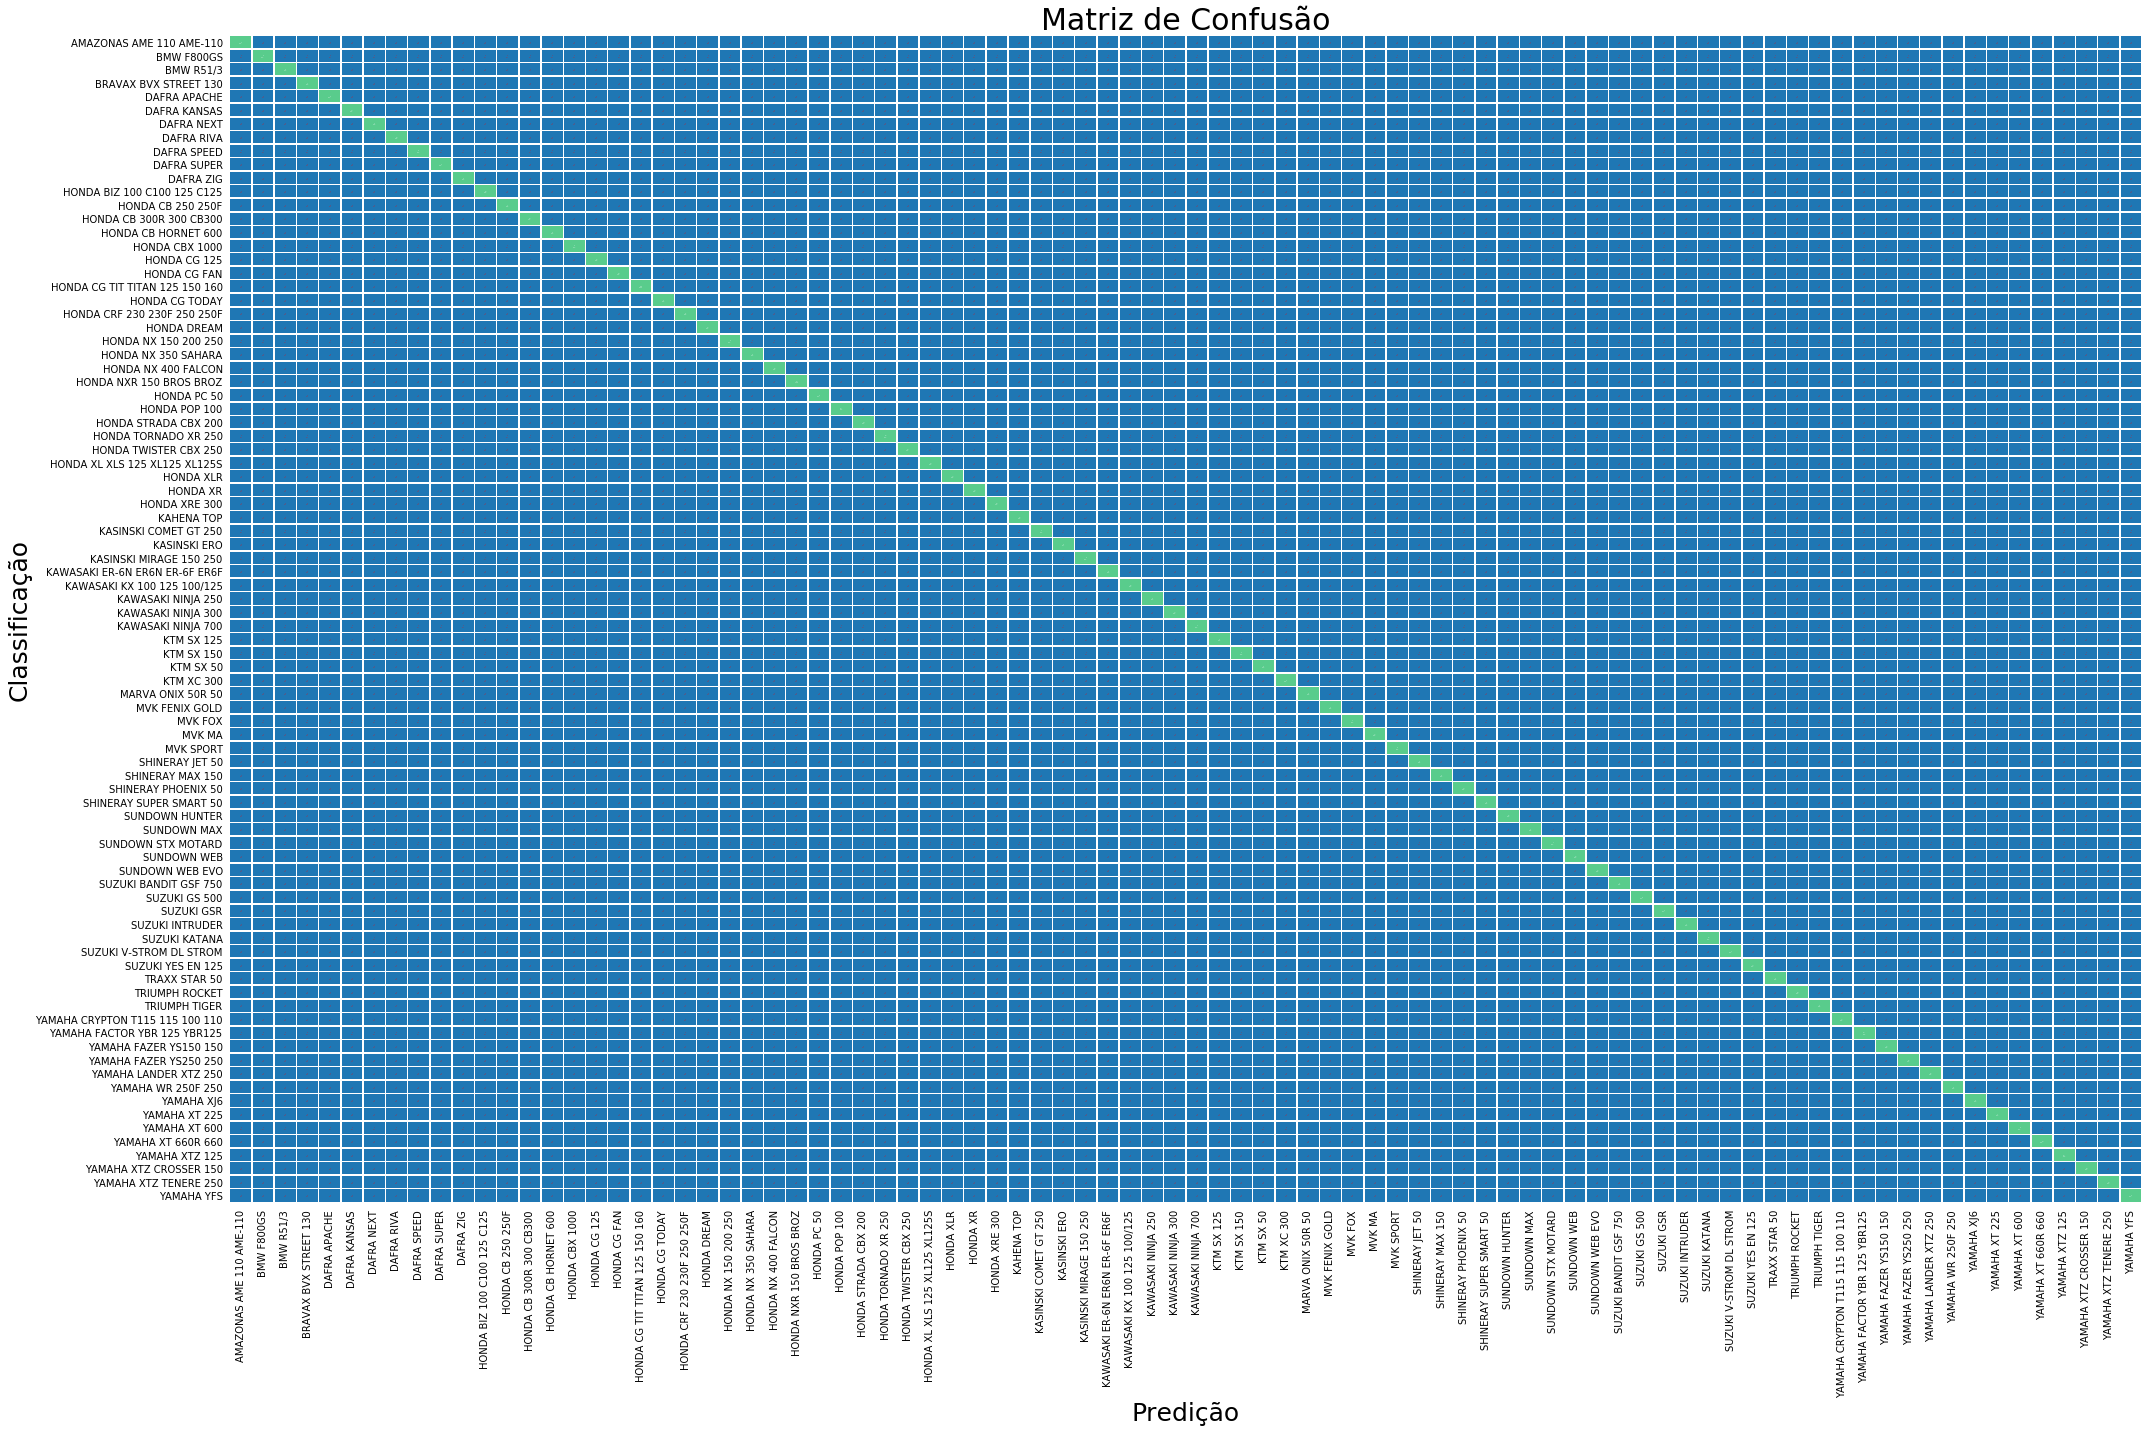

In [21]:
pretty_plot_confusion_matrix(dfmcsvc, annot=True, cmap="tab10", fmt='.0f', fz=1, lw=0.5, cbar=False, 
                             figsize=[30,20], show_null_values=2, pred_val_axis='x',insertTot=False) 

Apesar do grande número de classes, pode-se observar a linha formada pelos acertos na diagonal da imagem, demonstrando o alto índice de acerto do modelo.

Para melhorar a visão, esboçaremos a matriz de confusão para o item 'HONDA BIZ 100 C100 125 C125' versus o resto (OVR), isso nos permitirá ver a classificação como se fosse uma classificação binária OvR do tipo ou é a classificação demonstrada ou é o resto. 

In [22]:
# Função que plota a matriz de confusão "one versus rest (OvR)" do modelo
def plotConfusaoOvR(modelo, predicao, cm):
    # modelo = modelo de aplicação que será o "one" no "one versus rest"
    # predicao = resultado da predição do modelo
    # cm = matriz de confusão gerada do modelo
    aplicacoes = np.unique(predicao) # define os aplicações presentes no resultado
    pos = int(np.where(aplicacoes == modelo)[0]) # econtra a posição de modelo nas aplicações
    TP=cm[pos][pos]                                     # True Positive
    FP=sum([cm[pos][x] for x in range(cm.shape[0])])-TP # False Positive
    FN=sum([cm[x][pos] for x in range(cm.shape[0])])-TP # False Negative
    TN = sum([cm[x][x] for x in range(cm.shape[0])])-TP # True Negative
    confmod=np.array([[TP,FP],[FN,TN]]) # gera a matriz de confusão
    labels = [modteste[:10],'RESTO'] # reduz o nome do modelo aos primeiros 10 caracteres
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    #cax = ax.matshow(confmod)
    #plt.title(f'\nMatriz de Confusão do Classificador da Aplicação\n{modteste}\n',fontsize=20)
    #fig.colorbar(cax)
    #ax.set_xticklabels([''] + labels)
    #ax.set_yticklabels([''] + labels)
    #plt.xlabel('\nPredição',fontsize=14)
    #plt.ylabel('Classificação\n',fontsize=14)
    #plt.show()
    #pretty_plot_confusion_matrix(pd.DataFrame(confmod,index=labels,columns=labels),insertTot=False)
    pretty_plot_confusion_matrix(pd.DataFrame(confmod,index=labels,columns=labels), annot=True, cmap="tab10", 
                                 fmt='.2f', fz=14, lw=0.5, cbar=False, figsize=[5,5], show_null_values=2, 
                                 pred_val_axis='x',insertTot=False) 

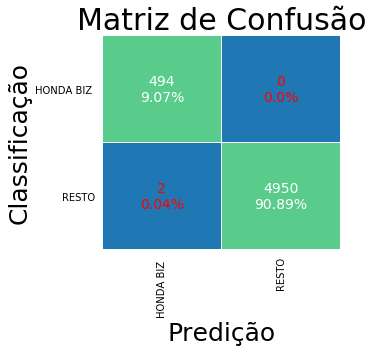

In [23]:
# gera o plot da matriz de confusão OvR para o modtste do resultadosvc
modteste='HONDA BIZ 100 C100 125 C125'
plotConfusaoOvR(modteste, resultadosvc, cmsvc)

### Utilização do Modelo

O modelo deverá receber uma descrição do produto conforme entrada do contribuinte na Declaração de Importação e deverá retornar a classificação de aplicação da motocicleta.

#### Teste com a linha de exemplo

In [24]:
print('index:', linha)
descricao = df.iloc[linha]['DESCRICAO DO PRODUTO'] 
# verifica a descrição do produto
descricao

index: 15252


'KIT DE TRANSMISSAO , MARCA RIFFEL, TITANIUM (1045) PARA MOTOCICLETAS CB 300R, COMPOSTO DE CORRENTE 520 X M184 + COROA 40067 37Z + PINHAO 25140 13Z (CERTIFICADO NR. BR31512031) - ITEM: 91050'

In [25]:
classificaAplicacaoSVC(criaModelo(descricao))

'HONDA CB 300R 300 CB300'

## <br><span style="color:blue">Modelo Multinomial Naive Bayes

### Treinamento do modelo

In [26]:
# Criando modelo
clfmnb = MultinomialNB()
# Treinamento do modelo
clfmnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Função de classificação

A função para utilização do modelo, recebe a descrição filtrada Modelo e retorna a aplicação.


In [27]:
def classificaAplicacaoMNB(modelo):
    novo_cvt = cvt.transform(pd.Series(modelo))
    novo_tfi = tfi.transform(novo_cvt)
    aplicacao = clfmnb.predict(novo_tfi)[0]
    return aplicacao

No final o nosso resultado mostrando (Modelo: descrição filtrada para o modelo e Aplicação: aplicação prevista).<br>

In [28]:
# Lista de exemplos de novos produtos
modelos = ['150 CG FAN HONDA TITAN',
           '125 CARGO CG HONDA TITAN',
           'BIZ C100 HONDA',
           '100 HONDA BIZ',
           '100 BIZ BRAVO HONDA',
           '125 YBR GT YAMAHA',
           '250F TWISTER HONDA']
# Loop for para fazer a predição do departamento de novos produtos
for modelo in modelos:
    print('Modelo:', modelo, 'Aplicação:', classificaAplicacaoMNB(modelo))

Modelo: 150 CG FAN HONDA TITAN Aplicação: HONDA CG TIT TITAN 125 150 160
Modelo: 125 CARGO CG HONDA TITAN Aplicação: HONDA CG TIT TITAN 125 150 160
Modelo: BIZ C100 HONDA Aplicação: HONDA BIZ 100 C100 125 C125
Modelo: 100 HONDA BIZ Aplicação: HONDA BIZ 100 C100 125 C125
Modelo: 100 BIZ BRAVO HONDA Aplicação: HONDA BIZ 100 C100 125 C125
Modelo: 125 YBR GT YAMAHA Aplicação: YAMAHA FACTOR YBR 125 YBR125
Modelo: 250F TWISTER HONDA Aplicação: HONDA TWISTER CBX 250


### Predição e avaliação do Modelo Multinomial Naive Bayes

#### Métricas

In [29]:
# Realizando a predição
resultadomnb = clfmnb.predict(X_test)
# Avaliando o modelo
print('Acurácia: {:.2f}'.format(metrics.accuracy_score(y_test, resultadomnb)))
print('Precisão: {:.2f}'.format(metrics.precision_score(y_test, resultadomnb,average='micro')))
print('Recall:   {:.2f}'.format(metrics.recall_score(y_test, resultadomnb,average='micro')))
print('F1_Score: {:.2f}'.format(metrics.f1_score(y_test, resultadomnb,average='micro')))

Acurácia: 0.93
Precisão: 0.93
Recall:   0.93
F1_Score: 0.93


In [30]:
# Avaliação completa
print(metrics.classification_report(y_test, resultadomnb))

                                 precision    recall  f1-score   support

       AMAZONAS AME 110 AME-110       0.00      0.00      0.00         4
                     BMW F800GS       0.00      0.00      0.00         3
                      BMW R51/3       0.00      0.00      0.00         3
          BRAVAX BVX STREET 130       0.00      0.00      0.00         1
                     BRP CAN-AM       0.00      0.00      0.00         1
                   DAFRA APACHE       1.00      1.00      1.00         9
                   DAFRA KANSAS       0.95      1.00      0.97        18
                     DAFRA NEXT       1.00      0.75      0.86         4
                     DAFRA RIVA       0.81      1.00      0.90        13
                    DAFRA SPEED       1.00      1.00      1.00         8
                    DAFRA SUPER       0.00      0.00      0.00         4
                      DAFRA ZIG       0.00      0.00      0.00         6
    HONDA BIZ 100 C100 125 C125       0.98      1.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


O alerta ao finial do relatório é esperado, tendo em vista que existem aplicações raras e que não aprecerem no grupo de teste.

#### Matriz de Confusão

In [31]:
aplicacoesmnb = np.unique(resultadomnb) # define os aplicações presentes no resultado
cmmnb = confusion_matrix(y_test, resultadomnb, aplicacoesmnb) # cria a matriz de confusão 
dfmcmnb=pd.DataFrame(cmmnb,index=aplicacoesmnb,columns=aplicacoesmnb) # converte a matriz em dataframe

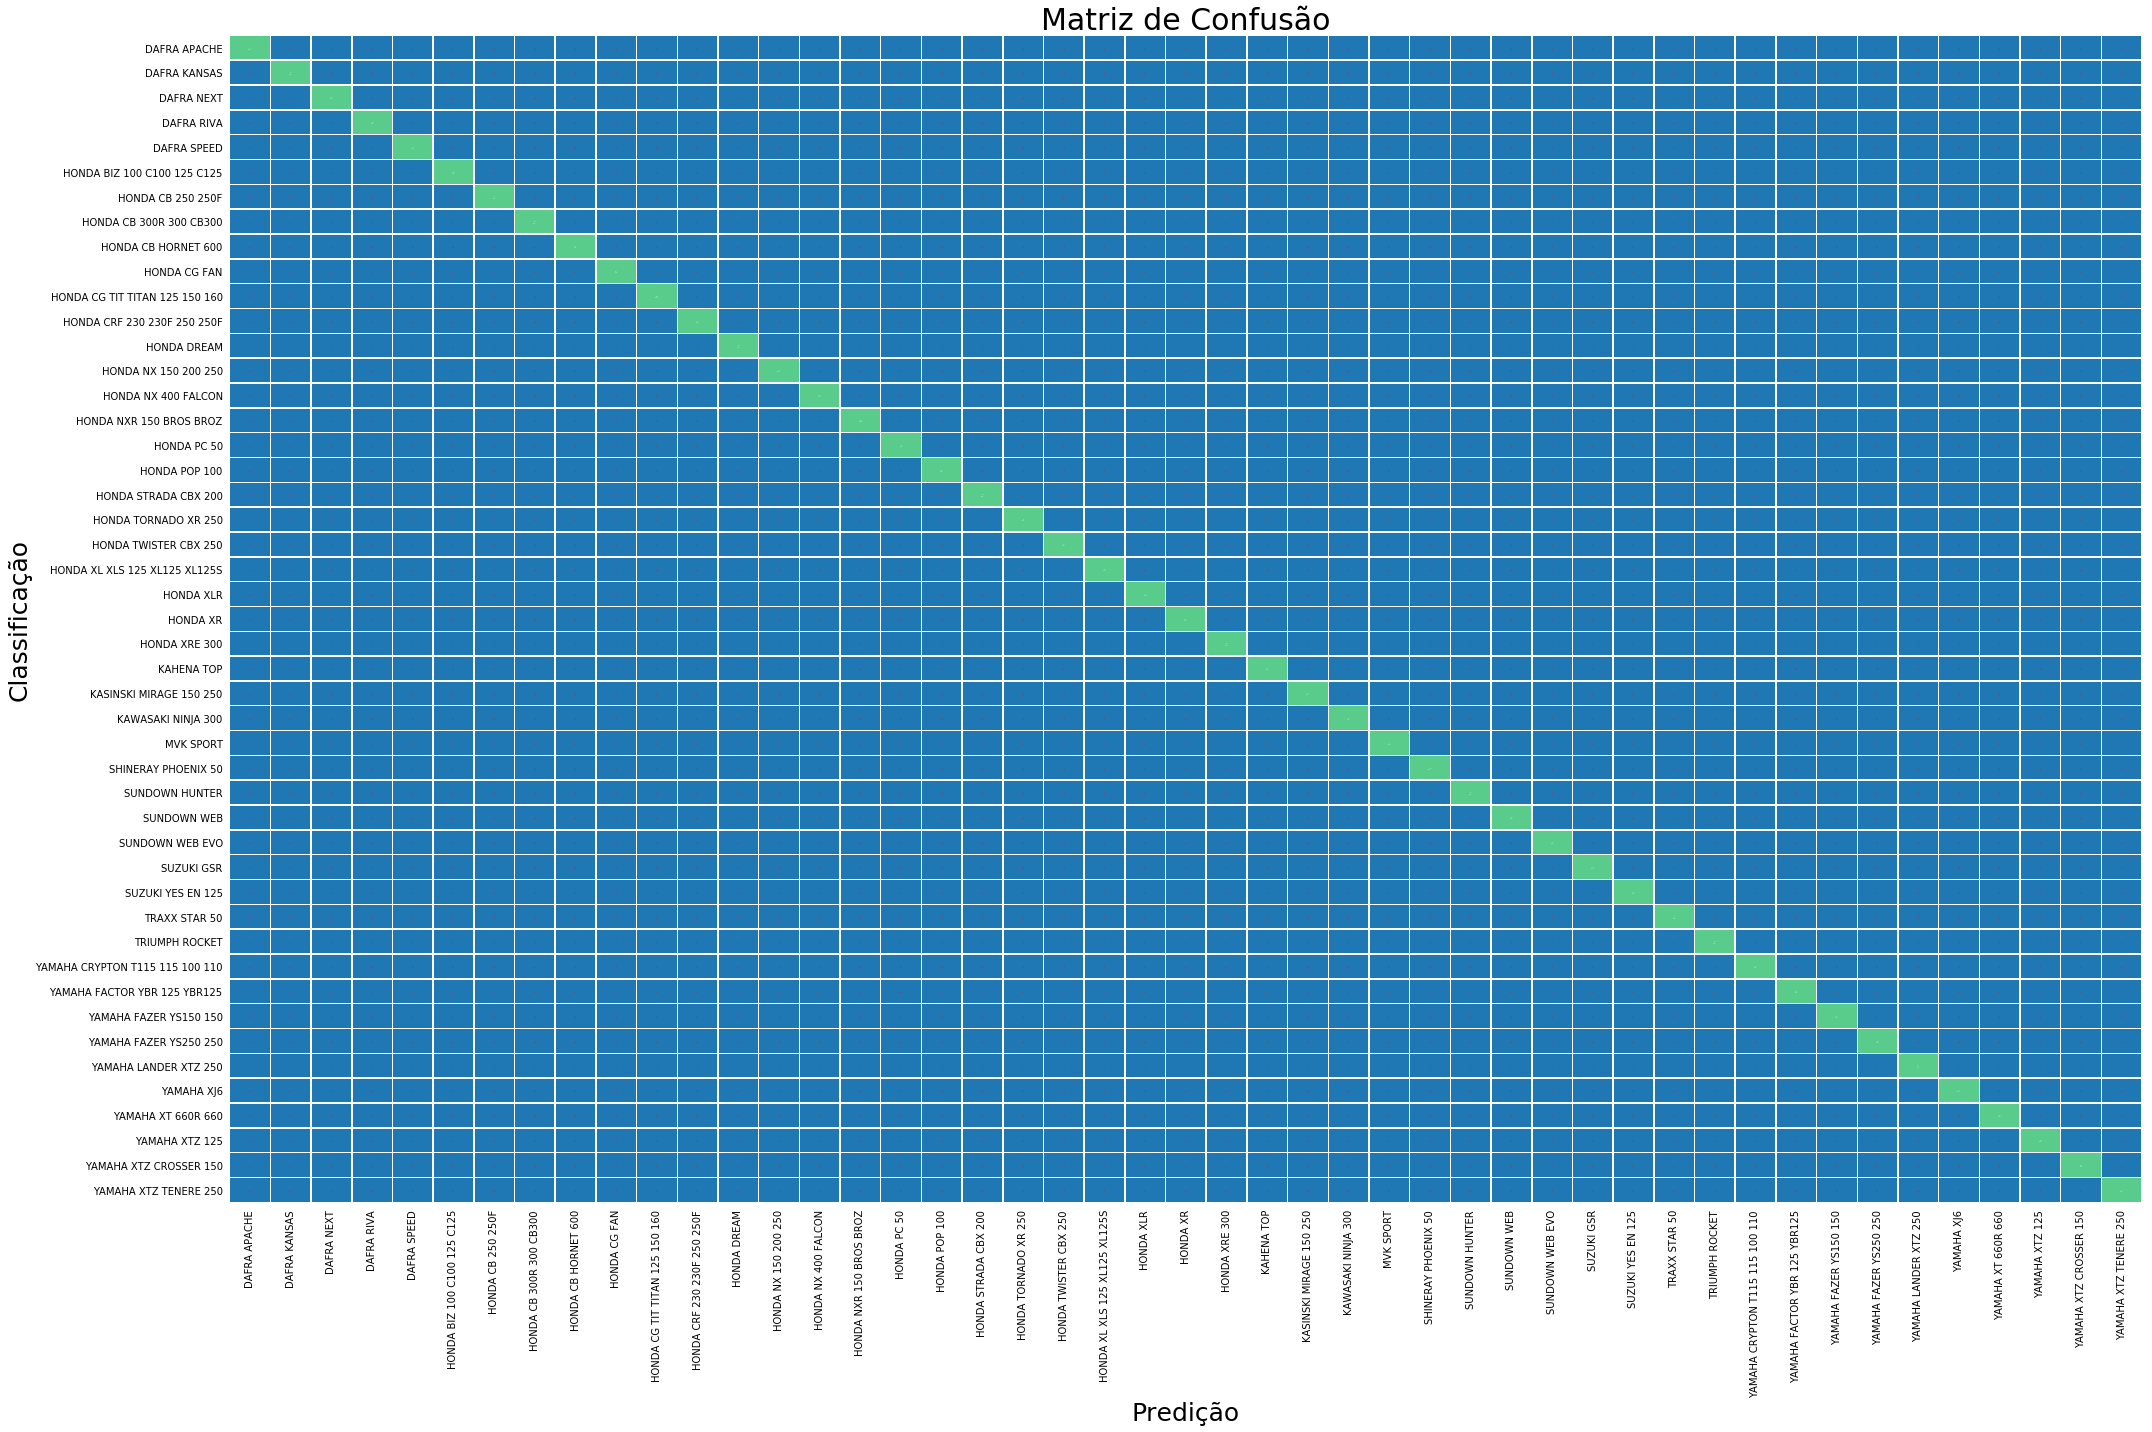

In [32]:
pretty_plot_confusion_matrix(dfmcmnb, annot=True, cmap="tab10", fmt='.0f', fz=1, lw=0.5, cbar=False, 
                             figsize=[30,20], show_null_values=2, pred_val_axis='x',insertTot=False) 

Apesar do grande número de classes, pode-se observar a linha formada pelos acertos na diagonal da imagem, demonstrando o alto índice de acerto do modelo.

Para melhorar a visão, esboçaremos a matriz de confusão para o item 'HONDA BIZ 100 C100 125 C125' versus o resto (OVR), isso nos permitirá ver a classificação como se fosse uma classificação binária OvR do tipo ou é a classificação demonstrada ou é o resto. 

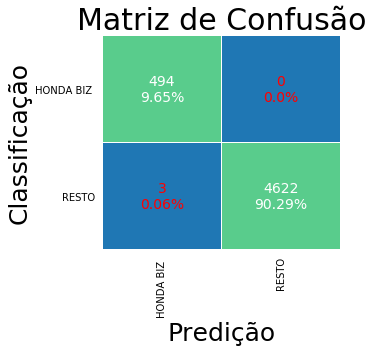

In [33]:
# gera o plot da matriz de confusão OvR para o modtste do resultadosvc
modteste='HONDA BIZ 100 C100 125 C125'
plotConfusaoOvR(modteste, resultadomnb, cmmnb)

### Utilização do Modelo

O modelo deverá receber uma descrição do produto conforme entrada do contribuinte na Declaração de Importação e deverá retornar a classificação de aplicação da motocicleta.

#### Teste com a linha de exemplo

In [34]:
print('index:', linha)
descricao = df.iloc[linha]['DESCRICAO DO PRODUTO'] 
# verifica a descrição do produto
descricao

index: 15252


'KIT DE TRANSMISSAO , MARCA RIFFEL, TITANIUM (1045) PARA MOTOCICLETAS CB 300R, COMPOSTO DE CORRENTE 520 X M184 + COROA 40067 37Z + PINHAO 25140 13Z (CERTIFICADO NR. BR31512031) - ITEM: 91050'

In [35]:
classificaAplicacaoMNB(criaModelo(descricao))

'HONDA CB 300R 300 CB300'

## <br><span style="color:blue">Modelo de Regressão Logística

### Treinamento do modelo

In [36]:
# Criando modelo
clflgr = LogisticRegression(solver='lbfgs',multi_class='multinomial')
# Treinamento do modelo
clflgr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Função de classificação

A função para utilização do modelo, recebe a descrição filtrada Modelo e retorna a aplicação.


In [37]:
def classificaAplicacaoLGR(modelo):
    novo_cvt = cvt.transform(pd.Series(modelo))
    novo_tfi = tfi.transform(novo_cvt)
    aplicacao = clflgr.predict(novo_tfi)[0]
    return aplicacao

No final o nosso resultado mostrando (Modelo: descrição filtrada para o modelo e Aplicação: aplicação prevista).<br>

In [38]:
# Lista de exemplos de novos produtos
modelos = ['150 CG FAN HONDA TITAN',
           '125 CARGO CG HONDA TITAN',
           'BIZ C100 HONDA',
           '100 HONDA BIZ',
           '100 BIZ BRAVO HONDA',
           '125 YBR GT YAMAHA',
           '250F TWISTER HONDA']
# Loop for para fazer a predição do departamento de novos produtos
for modelo in modelos:
    print('Modelo:', modelo, 'Aplicação:', classificaAplicacaoLGR(modelo))

Modelo: 150 CG FAN HONDA TITAN Aplicação: HONDA CG TIT TITAN 125 150 160
Modelo: 125 CARGO CG HONDA TITAN Aplicação: HONDA CG TIT TITAN 125 150 160
Modelo: BIZ C100 HONDA Aplicação: HONDA BIZ 100 C100 125 C125
Modelo: 100 HONDA BIZ Aplicação: HONDA BIZ 100 C100 125 C125
Modelo: 100 BIZ BRAVO HONDA Aplicação: HONDA BIZ 100 C100 125 C125
Modelo: 125 YBR GT YAMAHA Aplicação: YAMAHA FACTOR YBR 125 YBR125
Modelo: 250F TWISTER HONDA Aplicação: HONDA TWISTER CBX 250


### Predição e avaliação do Modelo de Regressão Logística

#### Métricas

In [39]:
# Realizando a predição
resultadolgr = clflgr.predict(X_test)
# Avaliando o modelo
print('Acurácia: {:.2f}'.format(metrics.accuracy_score(y_test, resultadolgr)))
print('Precisão: {:.2f}'.format(metrics.precision_score(y_test, resultadolgr,average='micro')))
print('Recall:   {:.2f}'.format(metrics.recall_score(y_test, resultadolgr,average='micro')))
print('F1_Score: {:.2f}'.format(metrics.f1_score(y_test, resultadolgr,average='micro')))

Acurácia: 0.99
Precisão: 0.99
Recall:   0.99
F1_Score: 0.99


In [40]:
# Avaliação completa
print(metrics.classification_report(y_test, resultadolgr))

                                 precision    recall  f1-score   support

       AMAZONAS AME 110 AME-110       1.00      1.00      1.00         4
                     BMW F800GS       1.00      0.33      0.50         3
                      BMW R51/3       1.00      1.00      1.00         3
          BRAVAX BVX STREET 130       1.00      1.00      1.00         1
                     BRP CAN-AM       0.00      0.00      0.00         1
                   DAFRA APACHE       1.00      1.00      1.00         9
                   DAFRA KANSAS       1.00      1.00      1.00        18
                     DAFRA NEXT       1.00      1.00      1.00         4
                     DAFRA RIVA       1.00      1.00      1.00        13
                    DAFRA SPEED       1.00      1.00      1.00         8
                    DAFRA SUPER       1.00      1.00      1.00         4
                      DAFRA ZIG       1.00      1.00      1.00         6
    HONDA BIZ 100 C100 125 C125       0.99      1.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\sit

O alerta ao finial do relatório é esperado, tendo em vista que existem aplicações raras e que não aprecerem no grupo de teste.

#### Matriz de Confusão

In [41]:
# importa os módulos
# gera a matriz de confusão formatada (adaptado por mim)
from prettyPlotConfusionMatrix import pretty_plot_confusion_matrix # prettyPlotConfusionMatrix.py local
# código disponível em https://github.com/wcipriano/pretty-print-confusion-matrix
from sklearn.metrics import confusion_matrix

In [42]:
aplicacoeslgr = np.unique(resultadolgr) # define os aplicações presentes no resultado
cmlgr = confusion_matrix(y_test, resultadolgr, aplicacoeslgr) # cria a matriz de confusão 
dfmclgr=pd.DataFrame(cmlgr,index=aplicacoeslgr,columns=aplicacoeslgr) # converte a matriz em dataframe

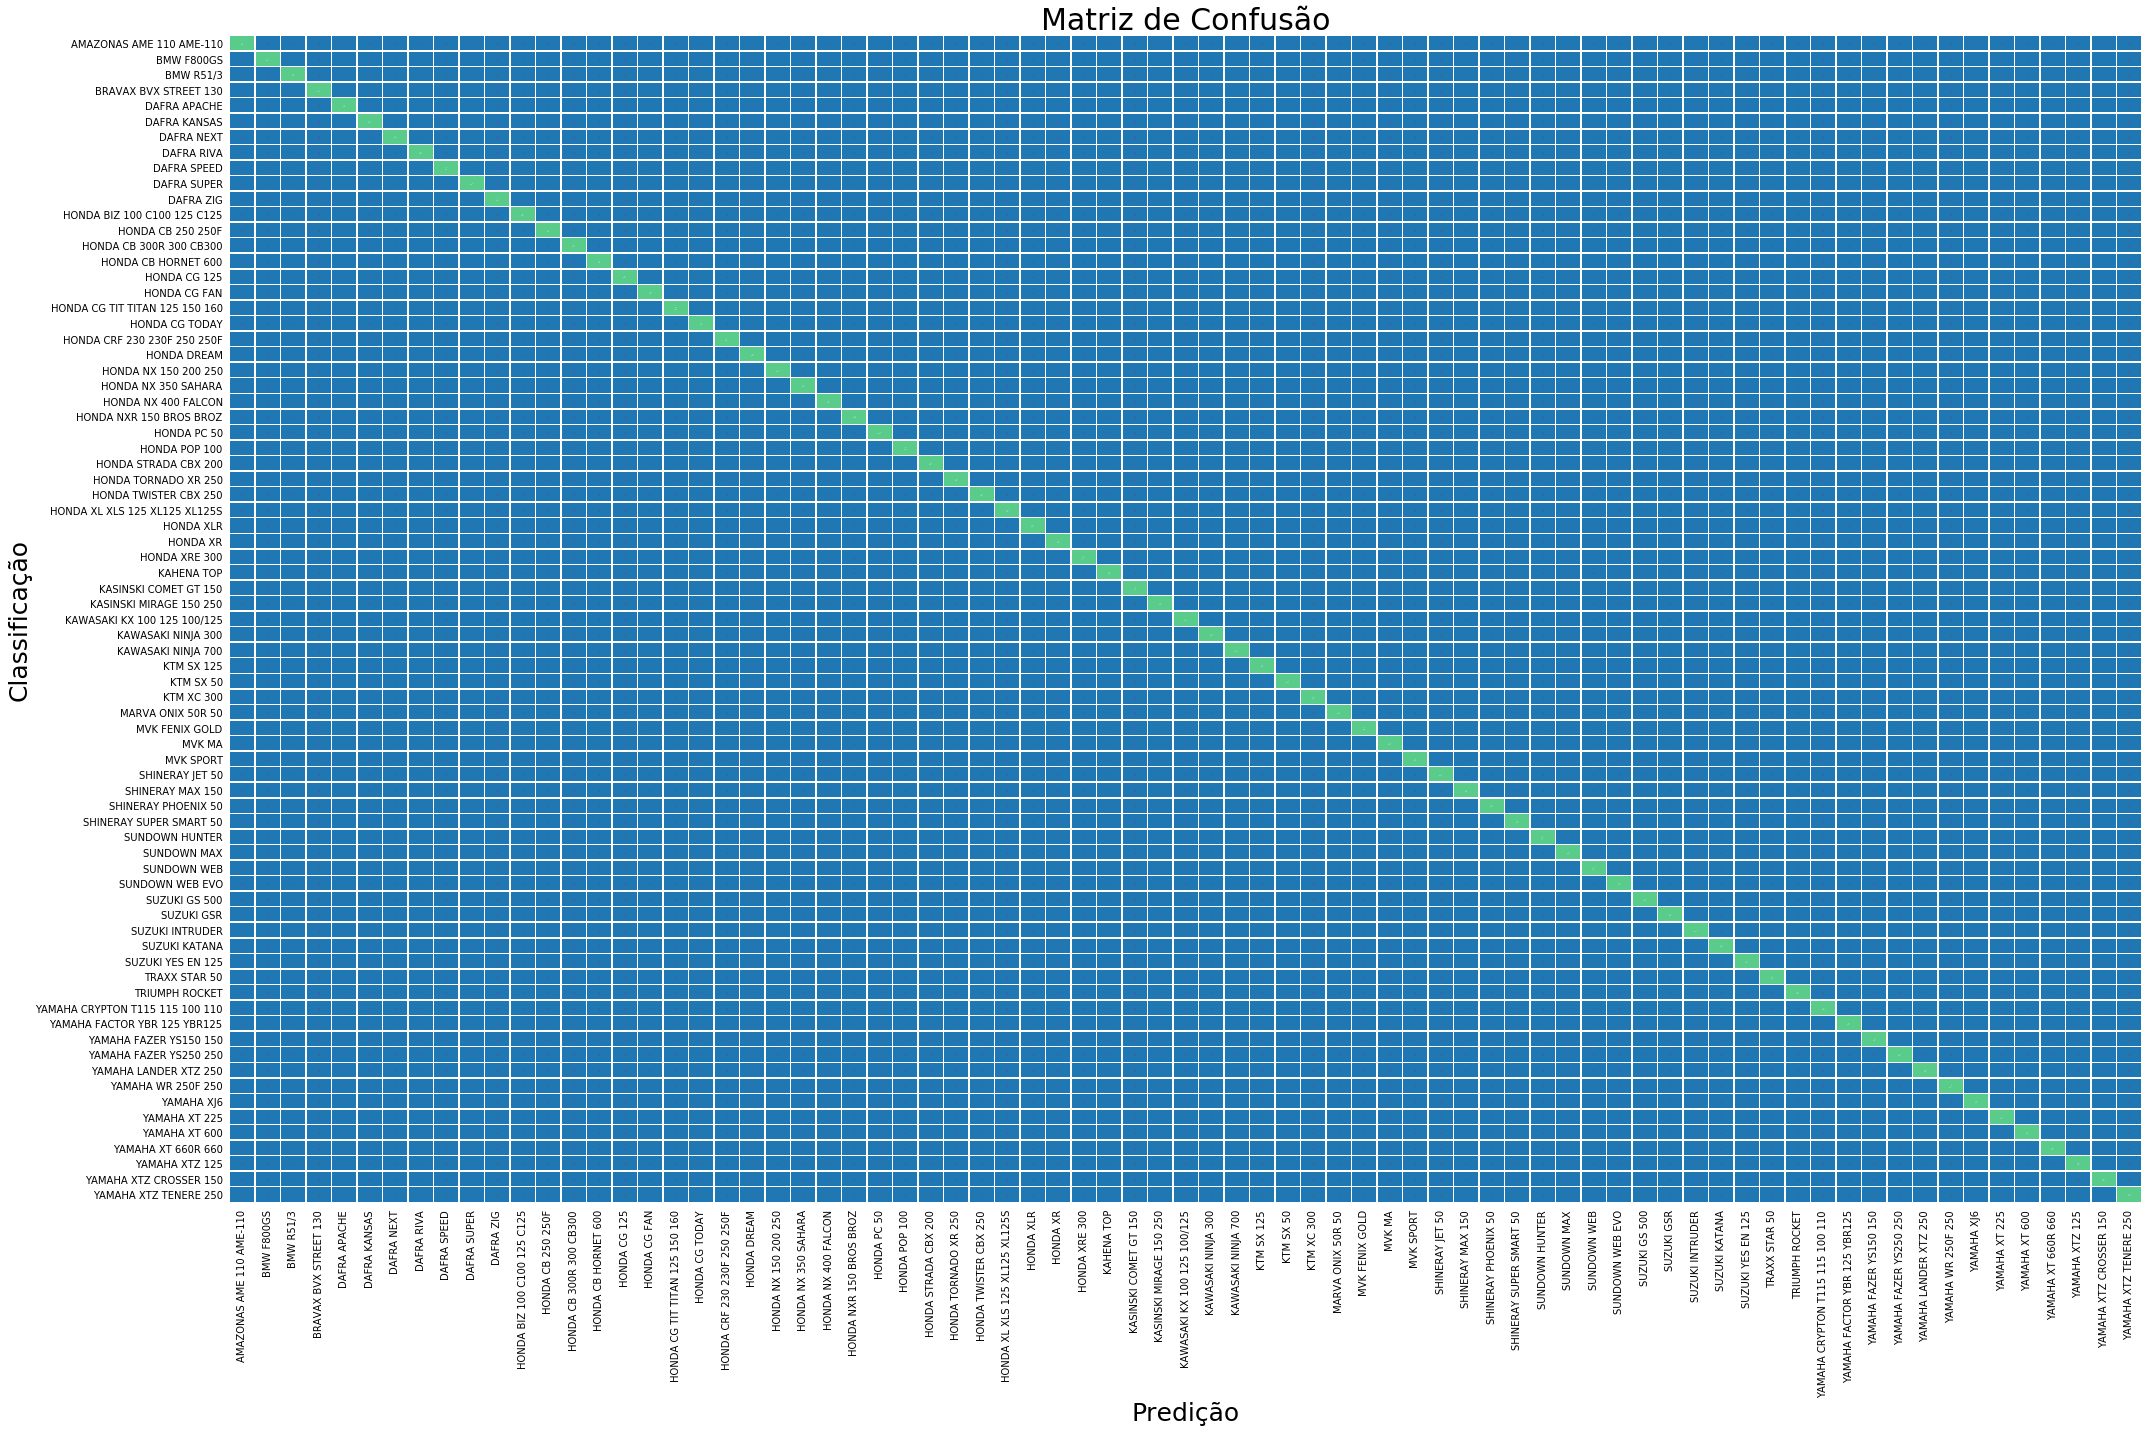

In [43]:
pretty_plot_confusion_matrix(dfmclgr, annot=True, cmap="tab10", fmt='.0f', fz=1, lw=0.5, cbar=False, 
                             figsize=[30,20], show_null_values=2, pred_val_axis='x',insertTot=False) 

Apesar do grande número de classes, pode-se observar a linha formada pelos acertos na diagonal da imagem, demonstrando o alto índice de acerto do modelo.

Para melhorar a visão, esboçaremos a matriz de confusão para o item 'HONDA BIZ 100 C100 125 C125' versus o resto (OVR), isso nos permitirá ver a classificação como se fosse uma classificação binária OvR do tipo ou é a classificação demonstrada ou é o resto. 

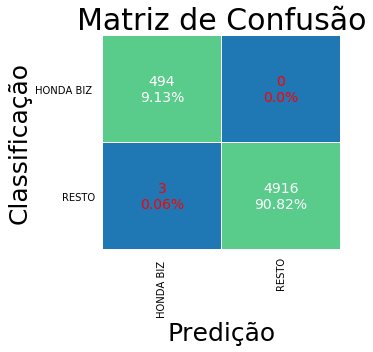

In [44]:
# gera o plot da matriz de confusão OvR para o modtste do resultadosvc
modteste='HONDA BIZ 100 C100 125 C125'
plotConfusaoOvR(modteste, aplicacoeslgr, cmlgr)

### Utilização do Modelo

O modelo deverá receber uma descrição do produto conforme entrada do contribuinte na Declaração de Importação e deverá retornar a classificação de aplicação da motocicleta.

#### Teste com a linha de exemplo

In [45]:
print('index:', linha)
descricao = df.iloc[linha]['DESCRICAO DO PRODUTO'] 
# verifica a descrição do produto
descricao

index: 15252


'KIT DE TRANSMISSAO , MARCA RIFFEL, TITANIUM (1045) PARA MOTOCICLETAS CB 300R, COMPOSTO DE CORRENTE 520 X M184 + COROA 40067 37Z + PINHAO 25140 13Z (CERTIFICADO NR. BR31512031) - ITEM: 91050'

In [46]:
classificaAplicacaoLGR(criaModelo(descricao))

'HONDA CB 300R 300 CB300'

## Escolha do Modelo

Todos os modelos tiveram performance em acertos semelhantes e qualquer um dos escolhidos desempenharia bem o papel de classificar as aplicações.<br>
A escolha tomou por base a performance em tempo de execução, sendo o modelo **Linear SVC** o mais rápido dos três analisados.